In [1]:
%cd ..

d:\tensorflowers


In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = load_dataset("shpotes/tfcol")
train_ds = dataset["train"]

Using custom data configuration default
Reusing dataset tf_col (C:\Users\Juanj\.cache\huggingface\datasets\tf_col\default\1.0.0\0c616218d5e0a194334e0ed0adacd86ab9b315ec6b03a8b388dece024753def2)
100%|██████████| 2/2 [00:00<00:00, 16.26it/s]


In [4]:
lats = train_ds["lat"]
longs = train_ds["lon"]
labels = train_ds["labels"]

In [5]:
original_df = pd.DataFrame({'lat':lats, 'lon':longs, 'label':labels})
spatial_df = original_df.explode('label')
original_df['len_lab'] = original_df['label'].apply(lambda x: len(x))
spatial_df.head()

,lat,lon,label
0,6.250013,-75.595688,17
1,4.597080,-74.079765,9
1,4.597080,-74.079765,0
2,7.116924,-73.128120,5
3,7.129667,-73.112076,5


In [6]:
spatial_df.explode('label').head(10)

,lat,lon,label
0,6.250013,-75.595688,17
1,4.597080,-74.079765,9
1,4.597080,-74.079765,0
2,7.116924,-73.128120,5
3,7.129667,-73.112076,5
4,4.598717,-74.078781,13
5,6.255044,-75.562042,5
6,4.681217,-74.049644,7
7,6.249551,-75.591042,16
8,6.260261,-75.564415,14


In [7]:
original_df['len_lab'].value_counts()

1    1906
2      88
3       5
4       1
Name: len_lab, dtype: int64

Casi todas las imágenes traen una sola etiqueta, 4.4% tienen dos, y <1% tienen 3 o más

In [8]:
label_dict = dict(enumerate(train_ds.features["labels"].feature.names))
spatial_df['label_str']=spatial_df['label'].apply(lambda x: label_dict[x])
spatial_df['label_str'].value_counts()

café/restaurante               476
tienda                         210
parqueadero                    206
talleres carros/motos          191
puesto móvil/toldito           150
ropa                           142
electrónica/cómputo             92
farmacia                        86
ferretería                      79
belleza/barbería/peluquería     78
electrodomésticos               60
supermercado                    59
hotel                           56
muebles/tapicería               54
bar                             46
carnicería/fruver               35
zapatería                       28
animales                        19
licorera                        19
deporte                         15
Name: label_str, dtype: int64

Lo que más está presente son licoreras, que representan un ~24% del total de las etiquetas. Le siguen farmacias y carnicerías/fruvers, ambas con ~10%, y cafés/restaurantes, con 9.5%. Las etiquetas que menos hay son hoteles (0.75%), talleres y zapaterías (1%) y bares (1.5%). De la cantidad tan baja de bares y alta de licoreras, sospecho que hay un sobrelapamiento en ambas, que tiende a caer en licoreras

<AxesSubplot:xlabel='lon', ylabel='lat'>

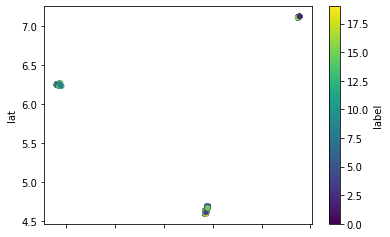

In [9]:
spatial_df.plot.scatter(x='lon', y='lat', c='label', colormap='viridis')

Hay tres grupos dentro de las coordenadas, o sea que al final tenemos tres ciudades

In [10]:
def city(row):
    if row['lat'] < 6:
        return 'Bogotá'
    elif row['lat'] < 6.5:
        return 'Medellín'
    else:
        return 'Bucaramanga'
spatial_df['ciudad'] = spatial_df.apply(city, axis = 1)

In [11]:
spatial_df['ciudad'].value_counts()

Medellín       989
Bogotá         799
Bucaramanga    313
Name: ciudad, dtype: int64

In [12]:
spatial_df[spatial_df['ciudad'] == 'Bogotá']['label_str'].value_counts()

café/restaurante               184
tienda                          95
parqueadero                     83
ropa                            68
electrónica/cómputo             61
electrodomésticos               50
puesto móvil/toldito            39
supermercado                    37
belleza/barbería/peluquería     36
farmacia                        34
bar                             21
hotel                           15
zapatería                       14
ferretería                      13
licorera                        11
carnicería/fruver               11
muebles/tapicería               10
deporte                          9
animales                         5
talleres carros/motos            3
Name: label_str, dtype: int64

In [13]:
spatial_df[spatial_df['ciudad'] == 'Bogotá'].head(1)

,lat,lon,label,label_str,ciudad
1,4.59708,-74.079765,9,electrodomésticos,Bogotá


In [14]:
spatial_df[spatial_df['ciudad'] == 'Medellín']['label_str'].value_counts()

café/restaurante               226
talleres carros/motos          171
tienda                          93
puesto móvil/toldito            87
parqueadero                     83
ferretería                      58
ropa                            41
hotel                           35
farmacia                        34
belleza/barbería/peluquería     27
muebles/tapicería               26
carnicería/fruver               21
electrónica/cómputo             21
supermercado                    19
bar                             13
zapatería                       10
animales                         9
electrodomésticos                6
licorera                         5
deporte                          4
Name: label_str, dtype: int64

In [15]:
spatial_df[spatial_df['ciudad'] == 'Medellín'].head(1)

,lat,lon,label,label_str,ciudad
0,6.250013,-75.595688,17,zapatería,Medellín


In [16]:
spatial_df[spatial_df['ciudad'] == 'Bucaramanga']['label_str'].value_counts()

café/restaurante               66
parqueadero                    40
ropa                           33
puesto móvil/toldito           24
tienda                         22
farmacia                       18
muebles/tapicería              18
talleres carros/motos          17
belleza/barbería/peluquería    15
bar                            12
electrónica/cómputo            10
ferretería                      8
hotel                           6
animales                        5
zapatería                       4
electrodomésticos               4
carnicería/fruver               3
supermercado                    3
licorera                        3
deporte                         2
Name: label_str, dtype: int64

In [17]:
spatial_df[spatial_df['ciudad'] == 'Bucaramanga'].head(1)

,lat,lon,label,label_str,ciudad
2,7.116924,-73.12812,5,café/restaurante,Bucaramanga


<AxesSubplot:xlabel='lon', ylabel='lat'>

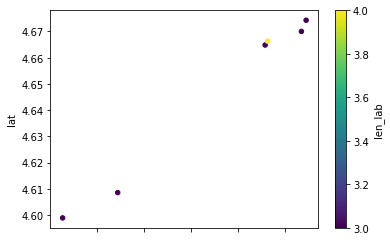

In [18]:
original_df[original_df['len_lab'] > 2].plot.scatter(x='lon', y='lat', c='len_lab', colormap='viridis')

<AxesSubplot:xlabel='lon', ylabel='lat'>

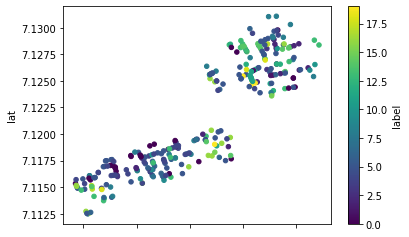

In [20]:
spatial_df[spatial_df['ciudad'] == 'Bucaramanga'].plot.scatter(x='lon', y='lat', c='label', colormap='viridis')

<AxesSubplot:xlabel='lon', ylabel='lat'>

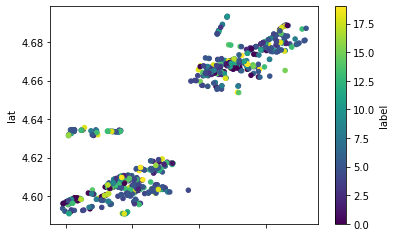

In [21]:
spatial_df[spatial_df['ciudad'] == 'Bogotá'].plot.scatter(x='lon', y='lat', c='label', colormap='viridis')

<AxesSubplot:xlabel='lon', ylabel='lat'>

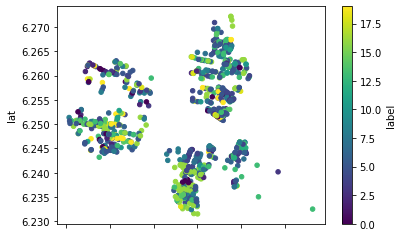

In [22]:
spatial_df[spatial_df['ciudad'] == 'Medellín'].plot.scatter(x='lon', y='lat', c='label', colormap='viridis')